# **Stack Overflow Annual Developer Survey**

## **2023**

In May 2023 over 90,000 developers responded to our annual survey about how they learn and level up, which tools they're using, and which ones they want.

In [485]:
import pandas as pd
import matplotlib.pyplot as plt

In [486]:
df = pd.read_csv("/content/survey_results_public_new.csv")

df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


### **Reduce the number of columns to the needed and Rename the "ConvertedComp" column name to Salary for readability**

In [487]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]

df = df.rename({"ConvertedComp": "Salary"}, axis=1)

df.head()


,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [488]:
df.shape

(41671, 5)

In [489]:
df.isna().sum()

Country           147
EdLevel          3340
YearsCodePro    10116
Employment        292
Salary          17630
dtype: int64

# **Drop null values**

In [490]:
df = df.dropna()

df.isna().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23540 entries, 7 to 41669
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       23540 non-null  object 
 1   EdLevel       23540 non-null  object 
 2   YearsCodePro  23540 non-null  object 
 3   Employment    23540 non-null  object 
 4   Salary        23540 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


In [492]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)

df.head()

,Country,EdLevel,YearsCodePro,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,40070.0
11,Spain,Some college/university study without earning ...,7,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,38916.0


## **Merged countries less than 400 developers into one category**

In [493]:
df["Country"].value_counts()

United States     5147
India             1778
United Kingdom    1576
Germany           1357
Canada             799
                  ... 
Guinea               1
Benin                1
Haiti                1
Namibia              1
Mauritania           1
Name: Country, Length: 143, dtype: int64

In [494]:
def shorten_categories(categories, cutoff):
    category_map = {}
    for i in range(len(categories)):
      if categories.values[i] >= cutoff:
        category_map[categories.index[i]] = categories.index[i]
      else:
        category_map[categories.index[i]] = "Other"

    return category_map

In [495]:
country_groups = shorten_categories(df.Country.value_counts(), 400)

df["Country"] = df["Country"].map(country_groups)

df.Country.value_counts()

Other             7013
United States     5147
India             1778
United Kingdom    1576
Germany           1357
Canada             799
Brazil             698
France             675
Spain              471
Netherlands        447
Australia          428
Italy              405
Name: Country, dtype: int64

## **Do a boxplot to show median salaries**

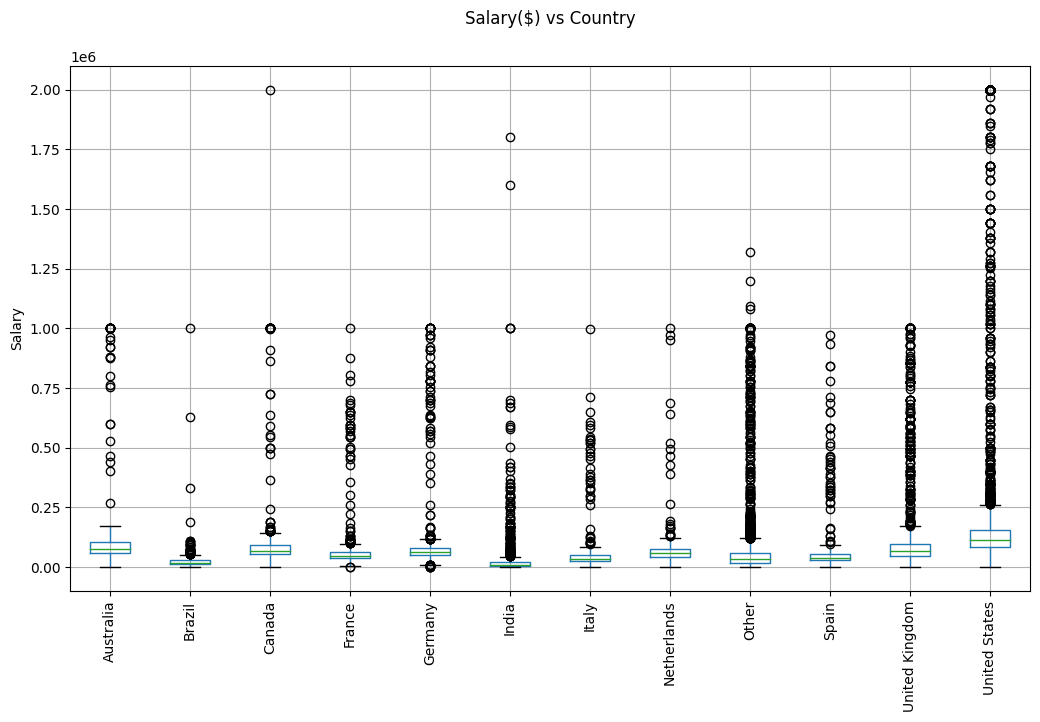

In [496]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot("Salary", "Country", ax=ax)
plt.suptitle("Salary($) vs Country")
plt.ylabel("Salary")
plt.xlabel("")
plt.xticks(rotation=90)
plt.title("")


plt.show()

## **Remove outliers**

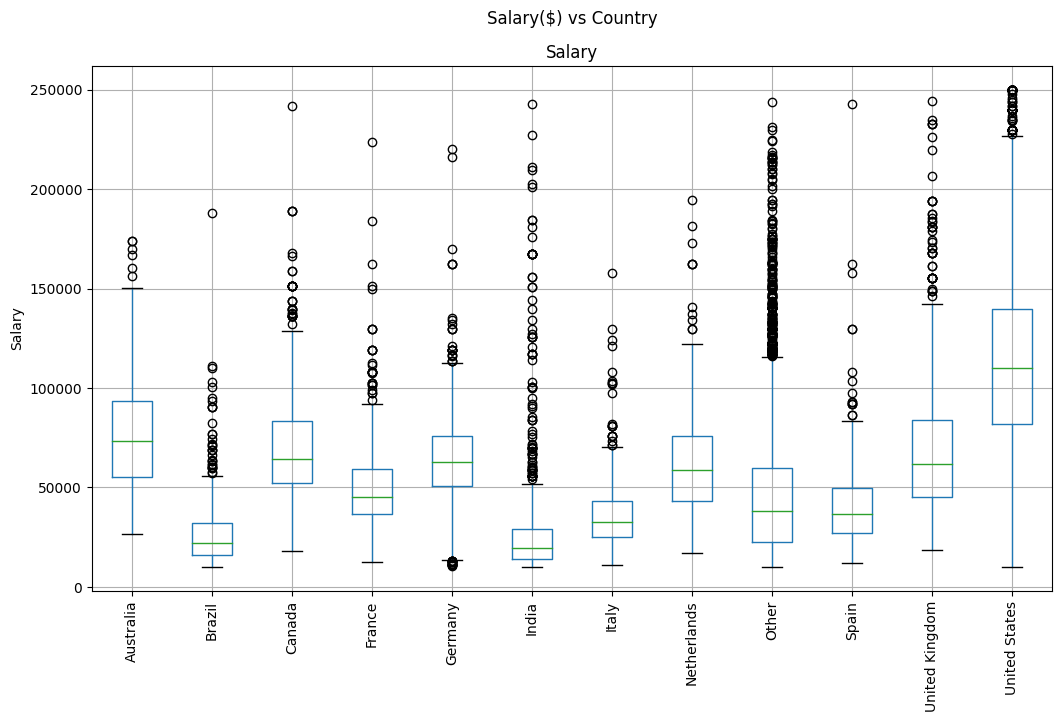

In [497]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot("Salary", "Country", ax=ax)
plt.suptitle("Salary($) vs Country")
plt.ylabel("Salary")
plt.xlabel("")
plt.xticks(rotation=90)
plt.show()

## **Feature Engineering**

In [498]:
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '14', '12', '29', '6',
       '28', '8', '23', '15', '25', '5', '9', '11', 'Less than 1 year',
       '21', '16', '18', '32', '19', '22', '38', '30', '26', '17', '27',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50'], dtype=object)

### **change the string to floats**

In [499]:
def clean_experience(x):
  if x == "Less than 1 year":
    return 0.5
  elif x == "More than 50 years":
    return 50
  else:
    return x

In [500]:
df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience)

In [501]:
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '14', '12', '29', '6',
       '28', '8', '23', '15', '25', '5', '9', '11', 0.5, '21', '16', '18',
       '32', '19', '22', '38', '30', '26', '17', '27', '24', '34', '35',
       '33', '36', '40', '39', 50, '31', '37', '41', '45', '42', '44',
       '43', '50'], dtype=object)

In [502]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [503]:
def clean_education(x):
  if "Bachelor’s degree" in x:
    return "Bachelor’s degree"
  if "Master’s degree" in x:
    return "Master’s degree"
  if "Professional degree" in x or "Other doctoral degree" in x:
    return "Post grad"
  return "Less than a Bachelor's degree"

In [504]:
df["EdLevel"] = df["EdLevel"].apply(clean_education)

In [505]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree',
       "Less than a Bachelor's degree", 'Post grad'], dtype=object)

## **Label Encoding**

In [506]:
from sklearn.preprocessing import LabelEncoder

le_education = LabelEncoder()

df["EdLevel"] = le_education.fit_transform(df["EdLevel"])

df["EdLevel"].unique()

array([0, 2, 1, 3])

In [507]:
le_country = LabelEncoder()

df["Country"] = le_country.fit_transform(df["Country"])

df["Country"].unique()

array([11, 10,  9,  7,  4,  2,  8,  6,  1,  3,  5,  0])

## **Split the data for training and testing**

In [508]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [509]:
y = y.values.reshape(-1, 1)
y.shape

(17586, 1)

## **Fitting and Predicting the Model**

## **LinearRegression**

In [510]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

linear_reg.fit(X, y)

LinearRegression()

In [511]:
y_pred1 = linear_reg.predict(X)

y_pred1

array([[96367.32690116],
       [70478.22826616],
       [66678.21264915],
       ...,
       [61739.22970329],
       [55435.81059556],
       [28453.57194105]])

## **Check for error margin**

In [512]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred1))

print("${:,.02f}".format(error))

$39,451.63


## The above error is too large.
## $36, 273 is too much for an error margin.

## We try another model

## **DecisionTree Regressor Model**

In [513]:
from sklearn.tree import DecisionTreeRegressor

dec_tree_reg = DecisionTreeRegressor(random_state=0)

dec_tree_reg.fit(X,y)

y_pred2 = dec_tree_reg.predict(X)

y_pred2

array([127561.25      ,  63945.43478261,  45223.29032258, ...,
        42649.95953757,  30415.07476636,  22050.94736842])

## **check for the error margin**

In [514]:
error = np.sqrt(mean_squared_error(y, y_pred2))

print("${:,.02f}".format(error))

$29,518.27


## **This offset is still too much, let's try out another one.**

In [515]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)

random_forest_reg.fit(X, y)

<ipython-input-515-85d76e3e3558>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_reg.fit(X, y)


RandomForestRegressor(random_state=0)

In [516]:
y_pred3 = random_forest_reg.predict(X)

y_pred3

array([127463.40911191,  63901.03112268,  45513.64935184, ...,
        42688.82808991,  30413.71674036,  21978.83736786])

## **check for error margin**

In [517]:
error = np.sqrt(mean_squared_error(y, y_pred3))

print("${:,.02f}".format(error))

$29,590.05


## **So, we see that "DecisionTreeRegressor" performed best, so we go for it.**

## But to get a better result, we could do a Hyper Tuning Parameter using GridSearch

In [518]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring="neg_mean_squared_error")
gs.fit(X, y)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [519]:
regressor = gs.best_estimator_

regressor.fit(X,y)
y_pred = regressor.predict(X)

error = np.sqrt(mean_squared_error(y, y_pred))

print("${:,.02f}".format(error))

$30,601.21


## The hyper tuned parameter still gave a huge error margin of $30,601.21

In [520]:
X

,Country,EdLevel,YearsCodePro
7,11,0,13
9,10,2,4
10,10,0,2
11,9,1,7
12,7,1,20
...,...,...,...
41654,11,0,3
41659,6,1,6
41662,8,2,5
41663,8,1,2


## **Test the Model with a sample data**

In [521]:
X = np.array([["United States", "Master's degree", 15]])

df = pd.DataFrame(X, columns=["Country", "Edlevel", "YearsCodePro"])

df

,Country,Edlevel,YearsCodePro
0,United States,Master's degree,15


In [522]:
X[:,0] = np.unique(X[:, 0])

X[:, 1] = np.unique(X[:, 1])



X[:,0] = le_country.fit_transform(X[:,0])
X[:,1] = le_education.fit_transform(X[:,1])

X = X.astype(float)

X

array([[ 0.,  0., 15.]])

## **predict using DecisionTreeRegressor**

In [523]:
y_pred = dec_tree_reg.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [524]:
y_pred

array([73094.45454545])

## **I got a $73, 904 salary for a software developer living the in US with a Master's degree with 15 years experience**

## **Save the model**

In [525]:
import pickle

data = {"model": regressor, "le_country": le_country, "le_education": le_education}

with open("saved_steps.pkl", "wb") as file:
  pickle.dump(data, file)

## **load the model for use**

In [526]:
with open("saved_steps.pkl", "rb") as file:
  data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]


In [527]:
y_pred = regressor_loaded.predict(X)

y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([73094.45454545])